/var/folders/h9/96x2b9pn2_v_xfb0gsxn97mw0000gn/T/ipykernel_76622/578368192.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1].scatter(


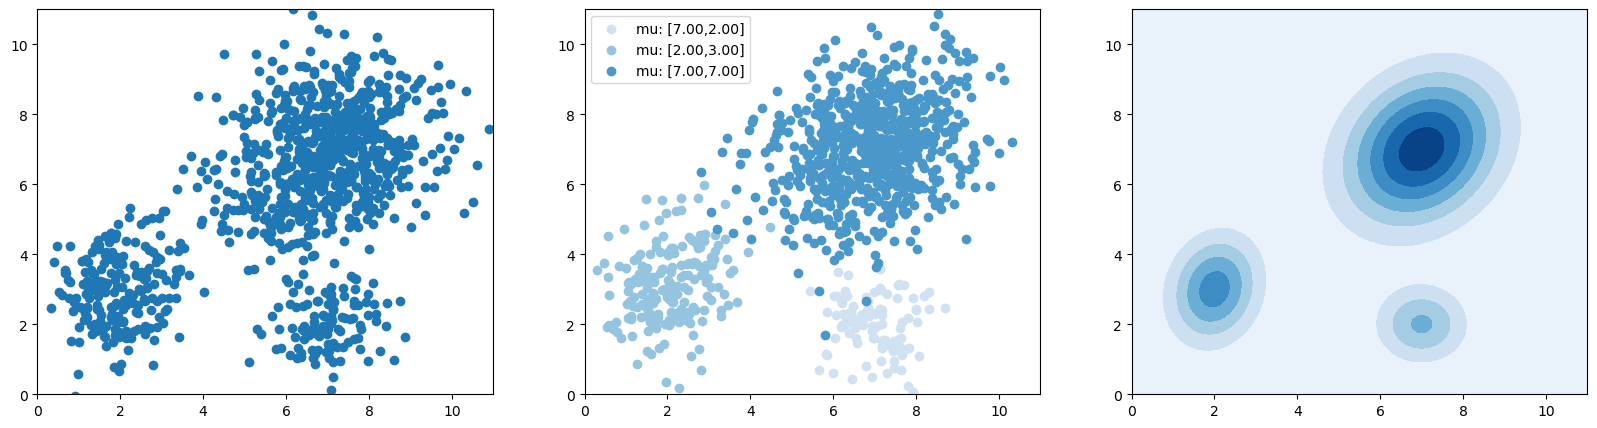

In [158]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import torch
import numpy as np
from pomegranate.distributions import Normal
from pomegranate.gmm import GeneralMixtureModel

p_z = [0.1, 0.2, 0.7]

mu_x = [
    [7.0,  2.0],
    [2.0, 3.0],
    [7.0, 7.0]
]

cov_x = [
    [[0.5,0.0],[0.0,0.5]],
    [[0.5,0.1],[0.1,1.0]],
    [[1.5,0.4],[0.4,2.0]]
]

dist = GeneralMixtureModel(
    distributions=[Normal(mu, cov) for mu, cov in zip(mu_x, cov_x)],
    priors=p_z
)

fig, ax = plt.subplots(1,3, figsize=(20,5))
num_samples = 1000

xlim = [0,11]
ylim = [0,11]

samples = dist.sample(num_samples)
ax[0].scatter(samples[:,0], samples[:,1])

color = cm.Blues(np.linspace(0.2,0.6,3))
for i,p in enumerate(p_z):
    n = int(num_samples*p)
    d = dist.distributions[i]
    samples = d.sample(n)
    mu = d.get_parameter('means').data.tolist()
    ax[1].scatter(
        samples[:,0], 
        samples[:,1], 
        label="mu: [{:.2f},{:.2f}]".format(mu[0], mu[1]),
        c=color[i]
    )
ax[1].legend()

x = torch.linspace(xlim[0], xlim[1], 100)
y = torch.linspace(ylim[0], ylim[1], 100)
points = torch.cartesian_prod(x, y)
probs = dist.probability(points)
ax[2].contourf(x, y, probs.view(100,100).T, origin="lower", cmap="Blues")

for a in ax:
    a.set_xlim(xlim)
    a.set_ylim(ylim)